# Gamma Exploration Notebook

## What is Gamma $(\Gamma)$?

Gamma measures how much the delta changes for every $\$1.00$ change in the underlying security's price. This makes it the second derivative of the option price with respect to the stock price.

## Example

$\Gamma = 0.6$

When the underlying stock goes up $\$1$, the option's delta increases by $0.6$, meaning the option gains $\$0.60$ in value.

In [122]:
# Point A
stock_A = 100
option_A = 50

In [123]:
# Point B
stock_B = 101
option_B = 50.55

In [124]:
# Point C
stock_C = 102
option_C = 51.10

Here we can calculate delta using our formula: $\Delta = \frac{\partial C}{\partial S}$

In [125]:
delta_AB = (option_B - option_A) / (stock_B - stock_A)
delta_BC = (option_C - option_B) / (stock_C - stock_B)

print(f"Delta from A to B: {delta_AB:.2f}")
print(f"Delta from B to C: {delta_BC:.2f}")

Delta from A to B: 0.55
Delta from B to C: 0.55


## Formulas

Here we can see that Gamma $(\Gamma)$ is the change in delta (rate of change of the option price with respect to the stock price)

**Formal Definition**

$$\Gamma = \frac{\partial^2C}{\partial S^2} = \frac{\partial \Delta}{\partial S}$$

**Practical Definition**

$$\Gamma = \frac{\text{change in delta}}{\text{change in stock price}}$$

In [126]:
gamma_AB = (delta_BC - delta_AB) / (stock_B - stock_A)
print('Gamma: ' + format(gamma_AB, '.2e'))

Gamma: 7.11e-15


We can create a function to help us calculate gamma in the future and this will be saved in ```src/formulas.py``` for later use

In [127]:
def calculate_gamma(s1, s2, s3, d1, d2):
    """
    Calculate gamma as the rate of change of delta with respect to the underlying price.
    
    Args:
        s1: First stock price
        s2: Second stock price
        s3: Third stock price (middle price point)
        d1: Delta calculated from first and second price points
        d2: Delta calculated from second and third price points
    
    Returns:
        The calculated gamma value
    """
    delta_change = d2 - d1
    stock_change = s3 - s1
    
    return delta_change / stock_change

## Delta and Gamma Simulation

Gamma $(\Gamma)$ is the derivative of Delta $(\Delta)$, and Delta is the derivative of the option price with respect to the underlying stock price. 

Using synthetic market data, we can calculate Delta and Gamma to better understand their behavior and relationship.

In [128]:
import random
import math
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to the path so we can import from src
sys.path.append(os.path.join(os.getcwd(), '..'))

from src.formulas import calculate_delta

## Synthetic Market Data Test 1

Time to create our own stock and option prices so we can play around with delta and gamma calculations without needing real market data.

### The Problem with Random Prices
Our first attempt created completely independent option prices - stock could go up while option went down! This breaks the fundamental relationship and gives us impossible deltas (sometimes > 1).

### The Fix - Correlated Movement (Current Attempt)
- Start with stock at $100, option at $50
- Stock jumps around ±1% each step (low volatility for stability)
- **Option moves track stock moves** with realistic delta changes (±0.01 per step)
- This ensures we get believable market behavior

### The Math We're Using
$$\text{Option Change} = \text{Stock Change} \times \text{Current Delta}$$
$$\text{New Option Price} = \text{Old Option Price} + \text{Option Change}$$
$$\text{New Delta} = \text{Old Delta} + \text{Small Random Change}$$

### Why This Should Work for Delta
- Option and stock move in correlated directions
- Delta stays within realistic bounds
- We control the randomness while maintaining mathematical relationships

### The Hidden Gamma Problem We're About to Discover
This approach looks good for delta calculations, but we're about to run into a **major issue when we calculate gamma**:

1. **We generate option prices using one set of deltas**
2. **But then we calculate delta backwards from the price changes** 
3. **These two delta values will be completely different!**

When we calculate gamma = (change in delta) / (change in stock price), we'll get wildly unrealistic values because:
- The "generation delta" ≠ "calculated delta" 
- Small rounding errors create huge delta variations
- Discrete steps amplify these differences

### Why Synthetic Data Anyway?
- We control the chaos and can see patterns clearly
- No need for real market data feeds or API keys
- Perfect for experimenting with our Greeks formulas
- Can test edge cases and extreme scenarios
- **Most importantly: We can see exactly where our calculations break down!**

In [ ]:
stock

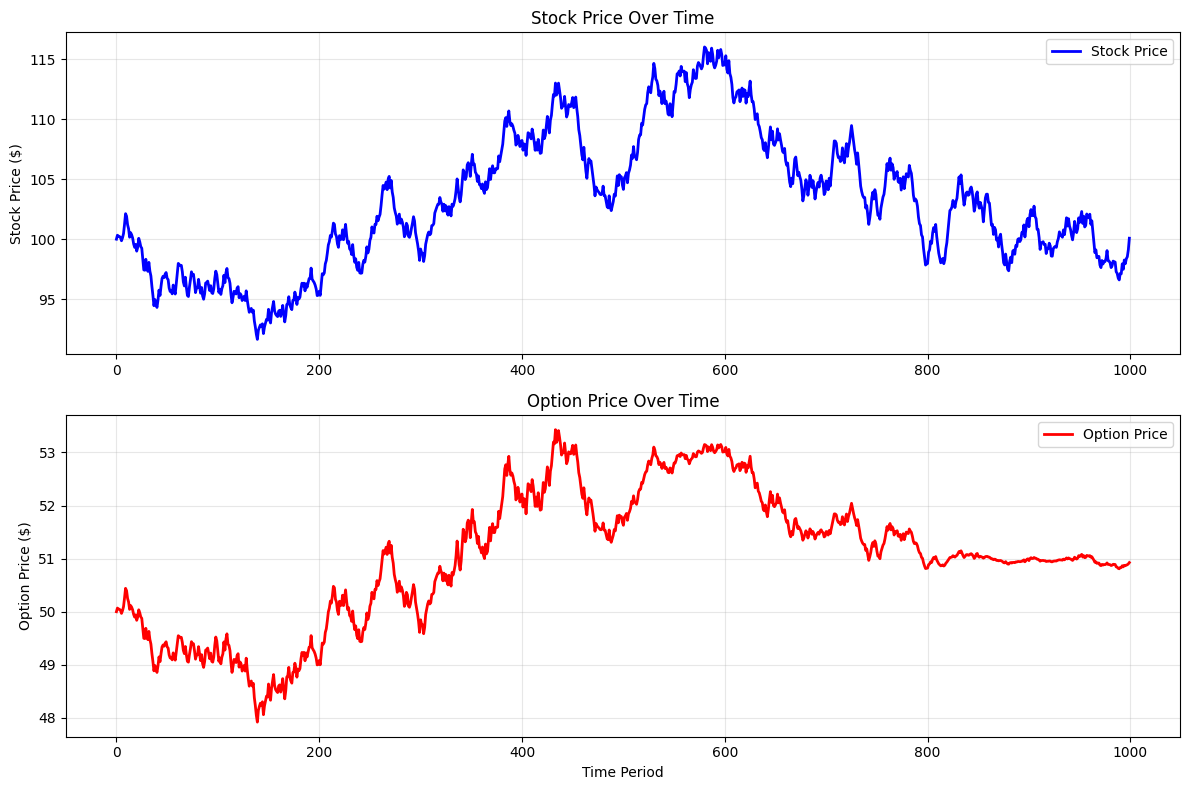

In [134]:
plt.figure(figsize=(12, 8))

# Plot stock data
plt.subplot(2, 1, 1)
plt.plot(stock_data, color='blue', linewidth=2, label='Stock Price')
plt.title('Stock Price Over Time')
plt.ylabel('Stock Price ($)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot option data
plt.subplot(2, 1, 2)
plt.plot(option_data, color='red', linewidth=2, label='Option Price')
plt.title('Option Price Over Time')
plt.xlabel('Time Period')
plt.ylabel('Option Price ($)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

Now lets find our deltas

In [131]:
deltas = []

for i in range(1, len(stock_data)):
    delta = calculate_delta(
        s1=stock_data[i-1], 
        s2=stock_data[i],
        o1=option_data[i-1], 
        o2=option_data[i]
    )
    deltas.append(delta)

print(f'Average Delta: {sum(deltas) / len(deltas):.4f}')
print(f'Min delta: {min(deltas):.4f} (between 0 and 1: {0 <= min(deltas) <= 1})')
print(f'Max delta: {max(deltas):.4f} (between 0 and 1: {0 <= max(deltas) <= 1})')
print()
print('Deltas:', deltas)

Average Delta: 0.1648
Min delta: 0.0061 (between 0 and 1: True)
Max delta: 0.3000 (between 0 and 1: True)

Deltas: [0.20760003399076354, 0.21669201936049445, 0.2238609738078223, 0.22137223969848302, 0.2171096736646008, 0.20900046324503563, 0.21692764967212969, 0.21043937623517744, 0.20571365123092747, 0.2106859270620625, 0.2061671751103927, 0.1967059244979873, 0.1979421843207487, 0.1912734533512096, 0.18194884998991157, 0.1850597119323334, 0.17509762545242671, 0.1793649031930901, 0.1765771951102996, 0.18224559579666655, 0.1912168956124691, 0.1821506046717388, 0.19082667892332558, 0.19513220724668676, 0.19821788235744023, 0.2038618549906015, 0.2129522006526077, 0.21286938293931051, 0.2125229412158453, 0.21250069207490715, 0.21090264804990225, 0.20724495926496503, 0.20719109685593867, 0.21548275896931923, 0.2060685569807047, 0.20255050273257652, 0.20252865954643973, 0.19450570098374556, 0.19549011348496517, 0.19982935497235904, 0.20269776128920122, 0.20250731053762244, 0.200219150172891,

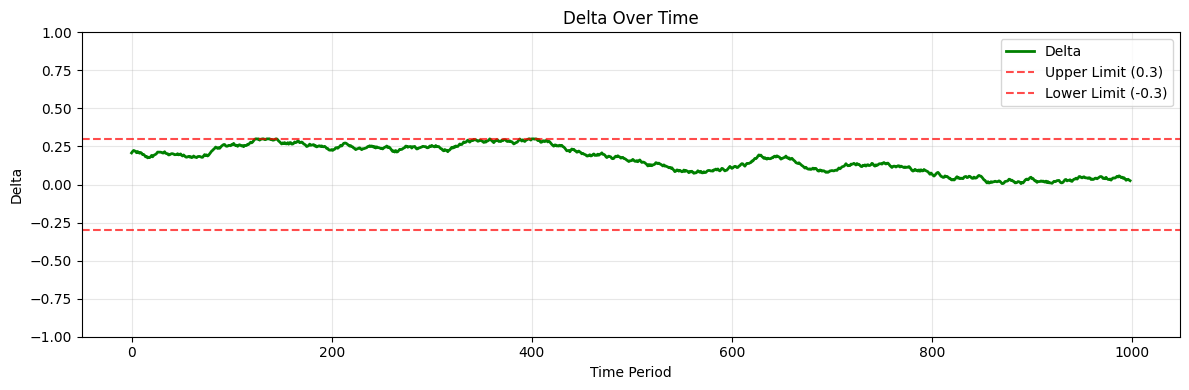

In [132]:
plt.figure(figsize=(12, 4))

# Plot deltas
plt.plot(deltas, color='green', linewidth=2, label='Delta')
plt.title('Delta Over Time')
plt.xlabel('Time Period')
plt.ylabel('Delta')
plt.ylim(-1, 1)  # Set y-axis range from -1 to 1
plt.axhline(y=0.3, color='red', linestyle='--', alpha=0.7, label='Upper Limit (0.3)')
plt.axhline(y=-0.3, color='red', linestyle='--', alpha=0.7, label='Lower Limit (-0.3)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [133]:
gammas = []

for i in range(1, len(deltas)):
    if i < len(stock_data) - 1:
        gamma = calculate_gamma(
            s1=stock_data[i-1], 
            s2=stock_data[i], 
            s3=stock_data[i+1], 
            d1=deltas[i-1], 
            d2=deltas[i]
        )
        gammas.append(gamma)

print(f'Average Gamma: {sum(gammas) / len(gammas):.4f}')
print(f'Min gamma: {min(gammas):.4f} (between -1 and 1: {-1 <= min(gammas) <= 1})')
print(f'Max gamma: {max(gammas):.4f} (between -1 and 1: {-1 <= max(gammas) <= 1})')
print()
print('Gammas:', gammas)

Average Gamma: 0.0132
Min gamma: -4.5451 (between -1 and 1: False)
Max gamma: 18.0676 (between -1 and 1: False)

Gammas: [0.036212475207996996, -0.0676014050185968, 0.02061531119842524, 0.012072996036311557, 0.5963865371779445, 0.013380376223996383, -0.005770259993856067, -0.002848392993652473, 0.007370868900202732, 0.0049348178831902685, 0.009007329484350554, -0.0011835071241024793, 0.02061922307463298, -0.04463917694743649, -0.006968375847129863, 0.012904271741277647, -0.005504619394291306, 0.0913750939517106, -0.01795270723070046, -0.03530268862665529, -0.008492358402566291, 0.018231768750104148, -0.006277050153282577, -0.005668730360201762, -0.0053821824043074245, -0.00504043378909367, 8.978071298638877e-05, -0.00039211487920133803, -0.0001226379766455817, 0.001590917406646269, -0.007731397816807327, -0.003201500610028107, -0.007347328603714188, 0.007397952100354712, 0.0021612875028848505, 1.3586708913847176e-05, 0.023526834416743615, 0.008727078783335812, -0.006608286715556095, 0.